# Introducción a DBSCAN

## Importamos las librerías y generamos el dataset

In [1]:
# importamos la librería para generar el data set de las lunas
from sklearn.datasets import make_moons

# Analisis numérico
import numpy as np

# Preprocesamiento de datos
from sklearn.preprocessing import StandardScaler

# Importamos los algoritmos de clasificación de Sklearn
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

# librería de gráficos
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [2]:
# Generamos el dataset
X, label = make_moons(n_samples=400, noise=0.07, random_state=19)
print(X[:5,])

[[-0.32858829  0.87217196]
 [ 0.94493253 -0.52862798]
 [-0.88914256  0.2766356 ]
 [ 0.67797712 -0.44767333]
 [ 1.37057962 -0.48283739]]


In [3]:
# Normalizamos los datos

X = StandardScaler().fit_transform(X)

In [4]:
print(X[:5,])

[[-0.96028459  1.23971879]
 [ 0.51506244 -1.56178944]
 [-1.60967489  0.04868502]
 [ 0.20580023 -1.39988542]
 [ 1.00816563 -1.47021124]]


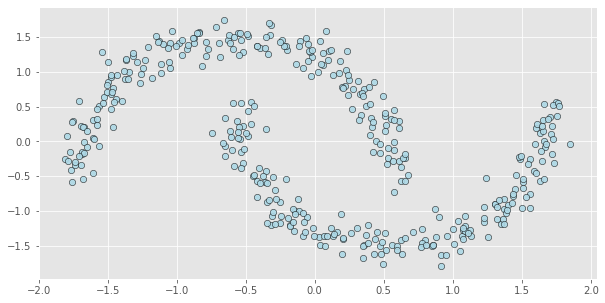

In [5]:
# Visualizamos el dataset

fig, ax = plt.subplots(figsize=(10,5))
sctr = ax.scatter(X[:,0],X[:,1], c='lightblue', edgecolor='black', s=40, alpha=0.9,
                 cmap=plt.cm.Set1)


## Clustering con K-Means

In [6]:
# Instanciamos el modelo y corremos el método fit.predict para obtener los clusters
# Como sabemos que son 2 lunas, seteamos el parámetro k = 2

km = KMeans(n_clusters=2, random_state=19)
y_km = km.fit_predict(X)

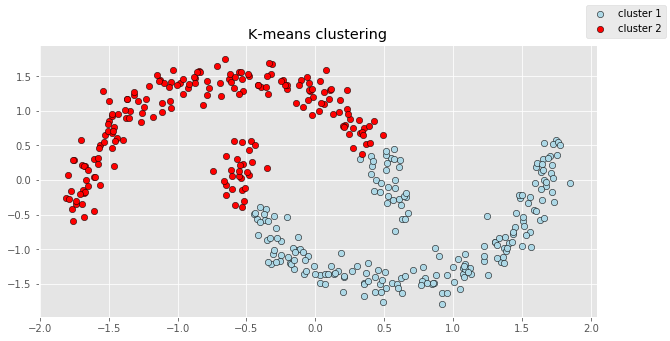

In [7]:
# Visualizamos los clusters generador por K-Means

fig, ax = plt.subplots(figsize=(10,5))
ax.scatter(X[y_km==0,0], X[y_km==0,1],c ='lightblue', edgecolor='black', marker='o',s=40, label='cluster 1')
ax.scatter(X[y_km==1,0], X[y_km==1,1],c ='red', edgecolor='black', marker='o',s=40, label='cluster 2')
ax.set_title('K-means clustering')
fig.legend();

## Clustering con DBSCAN

In [8]:
# Instanciamos el modelo y corremos el método fit.predict para obtener los clusters
# Seteamos los valores eps y min_samples

dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

In [9]:
# Vemos las etiquetas (-1 significa que el punto es "ruido")

y_dbscan

array([ 0,  1,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,  0,  1,  1,  1,  0,
        0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,  0,
        1,  0,  0,  0,  1,  1,  1,  0,  1,  1,  1,  0,  0,  1,  1,  0,  0,
        0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,  1,
        1,  1,  0,  1,  0,  1,  1, -1,  0,  1,  0,  0,  1,  0,  1,  0,  1,
        0,  1,  1,  1,  0,  0,  1,  1,  1,  1,  1,  1,  0,  1,  0,  0,  1,
        0,  0,  0,  1,  0,  1,  0,  0,  1,  0,  0,  1,  1,  0,  0,  1,  0,
        1,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  1,  1,  0,  1,  0,  0,
        0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  0,  0,
        1,  0,  0,  1,  1,  1,  0,  1,  0,  1,  1,  0,  1,  1,  0,  0,  0,
        0,  1,  1,  0,  1,  1,  0,  1,  0,  0, -1,  0,  0,  0,  1,  1,  1,
        1,  1,  1,  0,  1,  1,  0,  0,  1,  1,  0,  0,  1,  1,  0,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  1,  1,  0,  1,  1,  1,  0,  1,  1,  0,
        0,  1,  1,  1,  0

In [10]:
# Lista de los puntos core y máscara para graficar
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
dbscan.core_sample_indices_

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  76,  77,  78,  79,
        80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 103, 104, 105, 106,
       107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119,
       120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 181, 182, 183, 184, 185, 18

In [11]:
core_samples_mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [12]:
# Calculamos la cantidad de clusters generados
n_clusters_ = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_clusters_

2

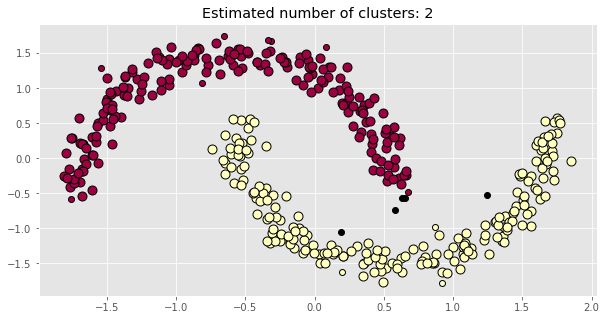

In [13]:
# Graficamos
unique_labels = set((y_dbscan))
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=[10,5])
for k, col in zip(unique_labels, colors):
    if k == -1:         
        col = [0, 0, 0, 1]
    class_member_mask = (y_dbscan == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=9)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_);

## Evaluamos performance de DBSCAN

In [14]:
# Importamos la librería de métricas
from sklearn import metrics

In [15]:
def eval_clust_per(X, labels):
    print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels))
    print("Calinsky-Harabasz Index: %0.3f" % metrics.calinski_harabasz_score(X, labels))

In [16]:
eval_clust_per(X, y_dbscan)

Silhouette Coefficient: 0.054
Calinsky-Harabasz Index: 177.500


> Silhouette score calcula lo compacto de un cluster, cuanto más alto mejor con 1 como valor más alto
> El problema es que Silhouette no evalúa bien las formas complejas. En este caso arroja un mal score, 
> cuando la clusterización es perfecta. De hecho, el score de K-Means es mejor. Lo mismo sucede con el Calinsky-Harabaz Index 

In [17]:
eval_clust_per(X, y_km)

Silhouette Coefficient: 0.500
Calinsky-Harabasz Index: 562.689


> Cómo resolvemos la definición de los hiperparámetros: no hay una respuesta única. Posibles caminos:
1) conocimiento del tema de análisis, 2) Hacer un análisis previo de la densidad del data set.